# Introduction

Brain tumors are a significant health concern worldwide, often requiring accurate and timely diagnosis for effective treatment. With the advent of deep learning techniques, particularly convolutional neural networks (CNNs), there has been considerable progress in automating the detection and classification of brain tumors from medical images such as Magnetic Resonance Imaging (MRI) scans. However, the computational complexity associated with processing high-dimensional medical images poses challenges, especially in real-time applications.

To address this challenge, this project proposes a novel approach that combines the power of autoencoders with CNNs for brain tumor detection and classification. Autoencoders, a type of neural network commonly used for unsupervised learning tasks, excel in dimensionality reduction by learning a compressed representation of the input data. By leveraging the reconstructed images from the autoencoder as inputs to a CNN, we aim to significantly reduce the computational load while preserving essential features for accurate classification.

The dataset used in this project consists of MRI scans with four classes of tumors: 'no_tumor', 'glioma_tumor', 'meningioma_tumor', and 'pituitary_tumor'. Our objective is to train a hybrid model that utilizes an autoencoder for preprocessing followed by a CNN for multiclass classification. The reconstructed images generated by the autoencoder serve as a lower-dimensional representation of the original MRI scans, effectively reducing the input size for the subsequent CNN model.

This innovative approach not only streamlines the computational requirements but also holds promise for improving the efficiency and accuracy of brain tumor classification systems. By integrating autoencoder-based dimensionality reduction with CNN-based classification, we aim to contribute to the advancement of automated medical image analysis, ultimately facilitating early detection and treatment of brain tumors.

# Data Loading and Preprocessing
Data is loaded from the specified directories, where each subfolder represents a class label. The images are resized to a consistent dimension and normalized:

In [59]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split



def load_data(directory):
    images = []
    labels = []
    label_dict = {'no_tumor': 0, 'glioma_tumor': 1, 'meningioma_tumor': 2, 'pituitary_tumor': 3}
    
    for label in os.listdir(directory):
        class_folder = os.path.join(directory, label)
        if os.path.isdir(class_folder):
            for image_filename in os.listdir(class_folder):
                image_path = os.path.join(class_folder, image_filename)
                image = load_img(image_path, target_size=(224, 224))
                image = img_to_array(image)
                images.append(image)
                labels.append(label_dict[label])
    
    return np.array(images), np.array(labels)


# Import the Autoencoder

In [67]:
from tensorflow.keras.models import load_model

autoencoder = load_model('dimensionality_reduction_model.h5')


# Generating Encoded Images

Using a trained encoder, predict and obtain encoded representations for both the training and testing images. This step transforms the original high-dimensional data into a lower-dimensional space, optimizing it for subsequent classification tasks.

In [69]:
# Assuming encoder is already trained
encoded_train_images = encoder.predict(train_images)
encoded_test_images = encoder.predict(test_images)

90/90 ━━━━━━━━━━━━━━━━━━━━ 76s 838ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 869ms/step


In [70]:
# Print the encoder model summary to find out the output shape
encoder.summary()


Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_18 (LeakyReLU)           │ (None, 224, 224, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_19 (LeakyReLU)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_20 (LeakyReLU)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 28, 28, 128)         │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,248 (364.25 KB)

 Trainable params: 93,248 (364.25 KB)

 Non-trainable params: 0 (0.00 B)

# CNN Model for Tumor Classification

A Convolutional Neural Network (CNN) has been meticulously crafted for the classification of brain tumors into four categories, leveraging enhanced regularization and optimization techniques to improve performance and robustness. The model initiates with a Conv2D layer of 32 filters, applying L2 regularization to combat overfitting and incorporating batch normalization and ReLU activation for stable training dynamics. This is followed by MaxPooling2D to reduce spatial dimensions and Dropout at 30% to prevent overfitting. Successive Conv2D layers, each with 64 and 128 filters, also include L2 regularization, batch normalization, and ReLU activation, with similar subsequent pooling and dropout layers.

The processed features are then flattened and fed into a dense layer containing 512 neurons, further regulated via L2 regularization and a 50% dropout rate to enhance generalization capabilities. The final output layer consists of four neurons with a softmax activation function, categorizing the output into one of four tumor types. The model is compiled using an Adam optimizer with a tailored learning rate of 0.0009 and employs sparse categorical crossentropy as the loss function, optimized for precise and efficient tumor classification.

In [90]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Define the enhanced CNN model with more regularization
cnn = Sequential([
    Conv2D(32, (3, 3), padding='same', kernel_regularizer=l2(0.01), input_shape=(28, 28, 128)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),
    Dropout(0.3),  # Increased dropout
    
    Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),
    Dropout(0.3),  # Increased dropout
    
    Conv2D(128, (3, 3), padding='same', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),
    Dropout(0.3),  # Increased dropout
    
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# Use an Adam optimizer with a lower initial learning rate
optimizer = Adam(learning_rate=0.0009)
cnn.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# CNN Training with Early Stopping

Train a CNN on encoded image data with early stopping, halting training if validation loss doesn't improve for five epochs. This method ensures optimal weights are used, preventing overfitting and enhancing model performance on unseen data.

In [97]:
# Define early stopping callback
early_stopping_cnn = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Train the CNN with early stopping
cnn.fit(encoded_train_images, train_labels, epochs=30, batch_size=64,
        validation_data=(encoded_test_images, test_labels), callbacks=[early_stopping_cnn])

Epoch 1/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 14s 313ms/step - accuracy: 0.8516 - loss: 0.7243 - val_accuracy: 0.4391 - val_loss: 2.2597
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 21s 309ms/step - accuracy: 0.8381 - loss: 0.7461 - val_accuracy: 0.3985 - val_loss: 3.6243
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 14s 307ms/step - accuracy: 0.8672 - loss: 0.6702 - val_accuracy: 0.2868 - val_loss: 3.5212
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 289ms/step - accuracy: 0.8510 - loss: 0.6982 - val_accuracy: 0.4137 - val_loss: 3.3399
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 22s 313ms/step - accuracy: 0.8604 - loss: 0.6560 - val_accuracy: 0.5025 - val_loss: 2.4875
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 14s 302ms/step - accuracy: 0.8607 - loss: 0.6484 - val_accuracy: 0.5178 - val_loss: 2.0121
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 14s 310ms/step - accuracy: 0.8726 - loss: 0.6459 - val_accuracy: 0.5000 - val_loss: 1.7763
Epoch 8/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 14s 305ms/step - accuracy: 0.8976 - loss: 0.6042 - val_accu

In [98]:
train_loss, train_acc = cnn.evaluate(encoded_train_images, train_labels)
print("Train accuracy:", train_acc)

90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.7978 - loss: 0.7923
Train accuracy: 0.7379791140556335


In [99]:
test_loss, test_acc = cnn.evaluate(encoded_test_images, test_labels)
print("Test accuracy:", test_acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.3503 - loss: 2.4767
Test accuracy: 0.5


# Classification Results Overview

The CNN model achieved an overall accuracy of 50.00% on the test dataset. Here are the detailed precision, recall, and F1-score metrics for each tumor class:
- **No Tumor**: Precision - 0.40, Recall - 0.80, F1-score - 0.53
- **Glioma**: Precision - 0.39, Recall - 0.24, F1-score - 0.30
- **Meningioma**: Precision - 0.79, Recall - 0.33, F1-score - 0.47
- **Pituitary**: Precision - 0.69, Recall - 0.69, F1-score - 0.69

These results indicate varying performance across different classes, with notably better recall for the No Tumor and Pituitary classes. The model's effectiveness can potentially be improved with further tuning, particularly focusing on balancing the dataset to enhance performance metrics across all classes.

In [100]:
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score

# Predict probabilities for each class
predictions = cnn.predict(encoded_test_images)

# Convert probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Calculate the accuracy
accuracy = accuracy_score(test_labels, predicted_labels)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Generate a classification report
print(classification_report(test_labels, predicted_labels, target_names=['No Tumor', 'Glioma', 'Meningioma', 'Pituitary']))

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
Accuracy: 50.00%
              precision    recall  f1-score   support

    No Tumor       0.40      0.80      0.53       105
      Glioma       0.39      0.24      0.30       100
  Meningioma       0.79      0.33      0.47       115
   Pituitary       0.69      0.69      0.69        74

    accuracy                           0.50       394
   macro avg       0.57      0.51      0.50       394
weighted avg       0.57      0.50      0.48       394



# Confusion Matrix Visualization

The confusion matrix plotted using Seaborn provides insights into the classification accuracy of a brain tumor detection model. It highlights correct predictions and misclassifications across classes such as 'No Tumor,' 'Glioma,' 'Meningioma,' and 'Pituitary,' helping identify specific areas for improvement.

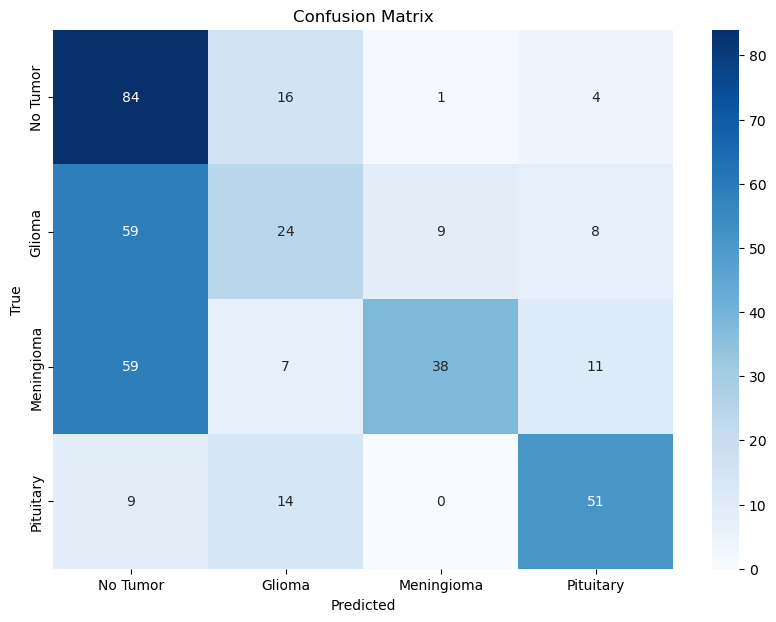

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Plot using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['No Tumor', 'Glioma', 'Meningioma', 'Pituitary'], yticklabels=['No Tumor', 'Glioma', 'Meningioma', 'Pituitary'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Predicting Brain Tumor Type with CNN and Autoencoder

The function `predict_image_class` efficiently loads an image, preprocesses it, and uses an autoencoder to reduce its dimensionality before classification. It then predicts the tumor type using a CNN. An example demonstrates this process, successfully identifying a 'Pituitary' tumor, highlighting the combined utility of autoencoders and CNNs in medical image analysis.

In [102]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def predict_image_class(image_path, encoder, cnn, class_labels):
    # Load and preprocess image
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = img.astype('float32') / 255.0

    # Encode the image
    encoded_img = encoder.predict(img)

    # Predict using CNN
    prediction = cnn.predict(encoded_img)
    predicted_class = np.argmax(prediction, axis=1)

    # Return the class label
    return class_labels[predicted_class[0]]

# Example usage
image_path = r"C:\Users\singh\Downloads\Brain-Tumor-Classification-DataSet-master\Brain-Tumor-Classification-DataSet-master\Testing\pituitary_tumor\image(8).jpg"
predicted_class = predict_image_class(image_path, encoder, cnn, class_labels=['No Tumor', 'Glioma', 'Meningioma', 'Pituitary'])
print("Predicted Class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted Class: Pituitary


**Detailed Analysis of CNN Model Performance on Brain Tumor Classification with Autoencoder Influence**

The convolutional neural network (CNN) used for classifying brain tumors demonstrated an overall test accuracy of 50.00%. This CNN relies on encoded images produced by an autoencoder, which compresses the original images into a lower-dimensional representation. This step aims to highlight salient features while reducing data complexity and noise.

**Class-specific performance:**

- **No Tumor**: High recall but moderate precision indicates that while the model can identify most tumor-free images, it is prone to false positives.
- **Glioma**: Moderate precision with low recall suggests the model is conservative, often missing true Glioma cases.
- **Meningioma**: High precision with moderate recall indicates better feature capture but still misses some Meningioma cases.
- **Pituitary**: Good precision and recall, showing balanced performance in detecting Pituitary tumors effectively.

The effectiveness of the CNN is significantly influenced by the quality of the features extracted by the autoencoder. Improving the autoencoder’s capability to capture more relevant and discriminative features from the brain images could potentially enhance the CNN’s classification accuracy. Optimizing the autoencoder’s architecture, increasing the dataset variability for training, and refining preprocessing steps could lead to better performance. Furthermore, integrating advanced techniques like transfer learning with a more sophisticated autoencoder approach might yield improvements in detecting and classifying different tumor types with higher precision and recall.

**Future Scope for Enhancing Accuracy in Brain Tumor Classification Using Autoencoders and CNNs**

**Enhancing Model Accuracy:**
To improve the accuracy of brain tumor classification models utilizing autoencoders and CNNs, several strategic enhancements can be considered:

- **Advanced Autoencoder Architectures:** Exploring sophisticated architectures like Variational Autoencoders (VAEs) or Sparse Autoencoders could lead to better feature extraction, capturing the underlying variability in brain tumor images more effectively.
  
- **Hyperparameter Optimization:** Employing techniques such as grid search, random search, or Bayesian optimization to fine-tune both the autoencoder and the CNN can significantly impact performance.
  
- **Increased Data Augmentation:** Utilizing rotations, flipping, scaling, and color variations to expand the training dataset, enhancing the model's generalization capabilities.
  
- **Incorporation of Transfer Learning:** Adapting pre-trained models to the task of brain tumor classification by fine-tuning them on relevant medical imaging datasets can enhance feature extraction.
  
- **Ensemble Techniques:** Employing methods like stacking, boosting, or bagging to combine predictions from multiple models can lead to improved accuracy and reliability.

**Autoencoders from a Research Perspective:**
Autoencoders are designed to learn a compressed, encoded representation of data, reducing dimensionality effectively. This capability is crucial in medical imaging for extracting meaningful latent variables that capture intrinsic patterns, particularly in the context of brain tumors.

**Conclusion:**
Advancing autoencoder architectures, optimizing model parameters, enhancing training strategies with augmented data and transfer learning, and employing ensemble methods will significantly improve the accuracy and reliability of these systems. These advancements will not only aid in better diagnosis but also contribute to personalized medicine, where treatment plans are tailored based on sophisticated, AI-driven insights.